<a href="https://colab.research.google.com/github/JnBrown27/bme3053c/blob/main/lessons-solved/06_Matrix_Transformations_10_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Matrix Transformations</h1>

---

<center><h2>Lesson 06</h2></center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/bme3053c/blob/main/lessons/06_Matrix_Transformations.ipynb)


# Introduction to Matrix Transformations

Matrix transformations are fundamental operations in linear algebra that have numerous applications in biomedical engineering. They allow us to manipulate and analyze multidimensional data, which is crucial in fields such as medical imaging, biomechanics, and signal processing.

In this lesson, we'll explore how to perform matrix transformations using Python's NumPy library and apply these concepts to biomedical engineering problems.


## Importing Required Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Basic Matrix Operations

 Before diving into transformations, let's review some basic matrix operations:

 * Matrix Addition: $\begin{bmatrix} a & b \\ c & d \end{bmatrix} + \begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} a+e & b+f \\ c+g & d+h \end{bmatrix}$

 * Matrix Multiplication: $\begin{bmatrix} a & b \\ c & d \end{bmatrix} \times \begin{bmatrix} e & f \\ g & h \end{bmatrix} = \begin{bmatrix} ae+bg & af+bh \\ ce+dg & cf+dh \end{bmatrix}$

 * Scalar Multiplication: $k \begin{bmatrix} a & b \\ c & d \end{bmatrix} = \begin{bmatrix} ka & kb \\ kc & kd \end{bmatrix}$

 * Matrix Transposition: $\begin{bmatrix} a & b \\ c & d \end{bmatrix}^T = \begin{bmatrix} a & c \\ b & d \end{bmatrix}$

 * Identity Matrix: $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$


# Examples of Matrix Transformations

Here are some common matrix transformations used to transform points:

 1. Translation: $\begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix}$

 2. Scaling: $\begin{bmatrix} s_x & 0 \\ 0 & s_y \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x' \\ y' \end{bmatrix}$

 3. Rotation (by angle θ): $\begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x' \\ y' \end{bmatrix}$

 4. Shear (horizontal): $\begin{bmatrix}1&k\\0&1\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}x'\\y'\end{bmatrix}$

  5. Reflection(about y-axis): $\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} x' \\ y' \end{bmatrix}$

These transformations can be combined by multiplying their respective matrices to create more complex transformations.


<center><img  src="https://github.com/uf-bme/bme3053c/raw/main/files/2D_affine_transformation_matrix.svg" alt='Matrix Transformations'/></center>

# Implementing Matrix Operations

In the following cells, we'll implement and demonstrate some basic matrix operations using NumPy. These operations form the foundation for more complex transformations we'll explore later.

We'll start by creating two matrices, A and B, and then perform addition and multiplication operations on them. This will help us understand how these operations work in practice and prepare us for applying them in more advanced scenarios, such as image transformations in medical imaging.


In [ ]:
# Creating matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)

# Matrix addition
print("\nA + B:")
print(A + B)

# Matrix multiplication
print("\nA * B:")
print(np.dot(A, B))
print("\nAnother way to multiply matrices using the @ operator:")
print(A @ B)
print("\nAnother way to multiply matrices:")
print(B @ A)

# Scalar multiplication
print("\n2 * A:")
print(2 * A)

# Matrix transposition
print("\nTranspose of A:")
print(A.T)

Matrix A:
[[1 2]
 [3 4]]

Matrix B:
[[5 6]
 [7 8]]

A + B:
[[ 6  8]
 [10 12]]

A * B:
[[19 22]
 [43 50]]

Another way to multiply matrices using the @ operator:
[[19 22]
 [43 50]]

Another way to multiply matrices:
[[23 34]
 [31 46]]

2 * A:
[[2 4]
 [6 8]]

Transpose of A:
[[1 3]
 [2 4]]


## Translation

  Translation moves points by a fixed distance in a given direction. In 2D, we can represent this using a 3x3 matrix:
  
  * Inverse translation: To undo a translation, we can apply the negative of the original translation.
    * For example, if we translated by (tx, ty), the inverse translation would be (-tx, -ty).

  * Homogeneous coordinates:
    * Homogeneous coordinates are a way of representing N-dimensional coordinates with N+1 numbers
    * We use homogeneous coordinates (adding a third coordinate of 1) to represent 2D points, allowing us to perform translations using matrix multiplication.
  

3.5


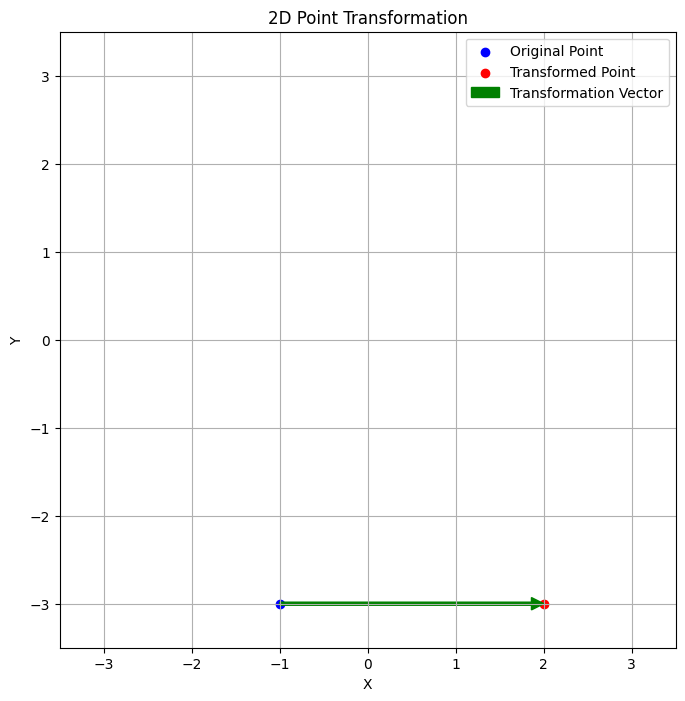

Original point: [-1 -3]
Transformed point: [ 2 -3]


In [4]:
def translate_2d(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])


# Example: Translate a point (1, 2) by (3, 4)
point = np.array([-1,-3])
translation = translate_2d(3,0)
# Convert point to homogeneous coordinates
homogeneous_point = np.append(point, 1)

# Apply translation
new_point = (translation@ homogeneous_point)[:2]

def visualize_transformation(point, new_point):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(point[0], point[1], color='blue', label='Original Point')
    ax.scatter(new_point[0], new_point[1], color='red', label='Transformed Point')

    # Calculate plot limits
    max_range = np.max(np.abs([*point,*new_point]))+0.5
    print(max_range)
    ax.set_xlim(-max_range, max_range)
    ax.set_ylim(-max_range, max_range)

    plot_width = max_range*2
    plot_height = max_range*2
    # Calculate arrow properties proportional to plot size
    arrow_width = 0.005 * plot_width  # Increased arrow width
    head_width = 0.02 * plot_width     # Increased head width
    head_length = 0.02 * plot_height    # Increased head length

    ax.arrow(point[0], point[1], new_point[0]-point[0], new_point[1]-point[1],
             color='green', width=arrow_width, head_width=head_width, head_length=head_length,
             length_includes_head=True, label='Transformation Vector')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('2D Point Transformation')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal')
    plt.show()

    print("Original point:", point)
    print("Transformed point:", new_point)

# Call the function with the original and translated points
visualize_transformation(point, new_point)

## Exercise: Translate a point
In this exercise, we'll apply our knowledge of matrix transformations to translate a point.

Objectives:
1. Create a point centered at (3,4)
2. Translate the point 4 units down.


8.5


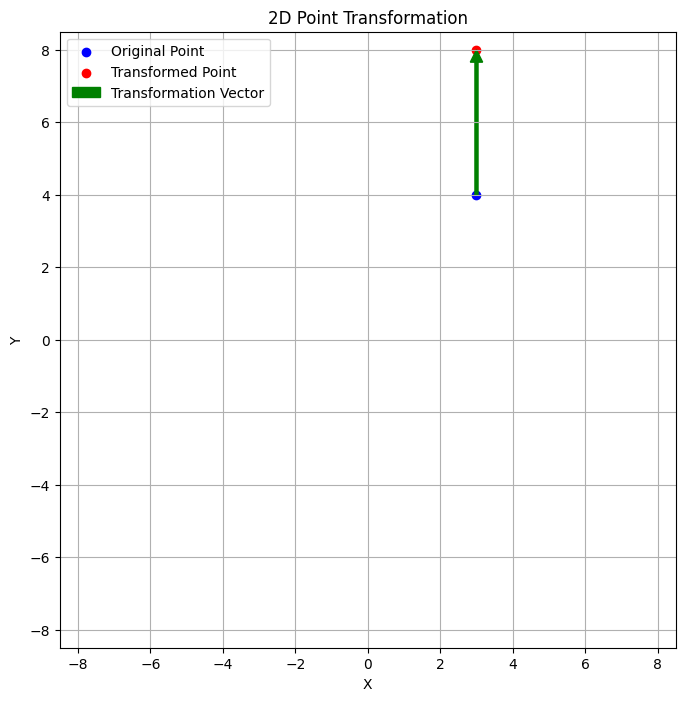

Original point: [3 4]
Transformed point: [3 8]


In [ ]:
#Translate the point


# Example: Translate a point (1, 2) by (3, 4)
point = np.array([3,4])
translation = translate_2d(0,4)
# Convert point to homogeneous coordinates
homogeneous_point = np.append(point, 1)

# Apply translation
new_point = (translation@ homogeneous_point)[:2]


# Call the function with the original and translated points
visualize_transformation(point, new_point)

## Scaling

Scaling changes the size of an object. In 2D, we can represent this using a 2x2 matrix:


Original point: [2 3]
Scaled point: [4.  1.5]
4.5


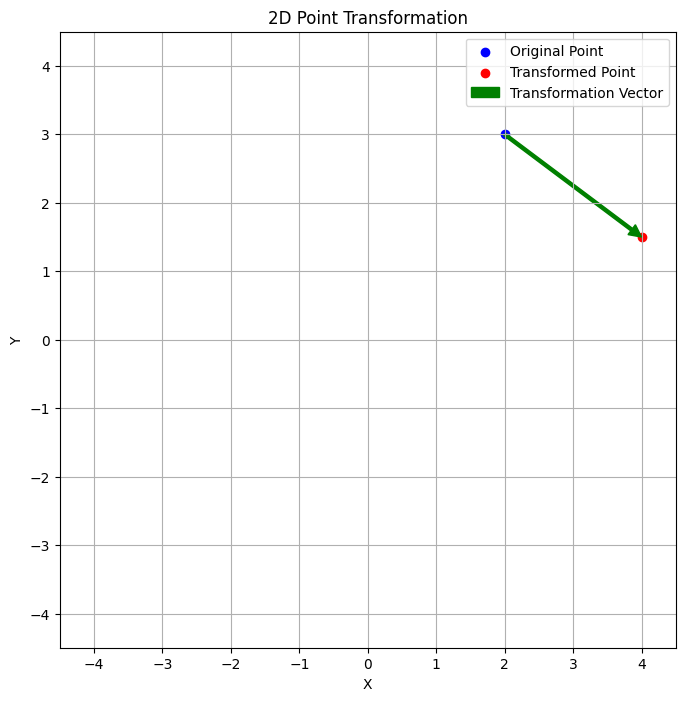

Original point: [2 3]
Transformed point: [4.  1.5]


In [ ]:
def scale_2d(sx, sy):
    return np.array([
        [sx, 0],
        [0, sy]
    ])

# Example: Scale a point (2, 3) by factors of 2 and 0.5
point = np.array([2, 3])
scaling = scale_2d(2, 0.5)
new_point = np.dot(scaling, point)

print("Original point:", point)
print("Scaled point:", new_point)

visualize_transformation(point, new_point)

## Rotation

Rotation turns an object around a fixed point. In 2D, we can represent this using a 2x2 matrix:
Key points about matrix rotations:
* The rotation matrix for a counterclockwise rotation by angle θ is:
$\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}$

* Rotation preserves the distance from the origin and the shape of the object.

* Consecutive rotations can be combined by multiplying their matrices.

 * The inverse of a rotation matrix is its transpose, making it easy to undo rotations.
    For a rotation matrix R(θ):
    $R(\theta)^{-1} = R(\theta)^T = R(-\theta) =$
   $\begin{bmatrix}
   \cos(\theta) & \sin(\theta) \\
   -\sin(\theta) & \cos(\theta)
   \end{bmatrix}$

* In 3D, rotations become more complex and can be represented using 3x3 matrices or other methods like quaternions.


1.5


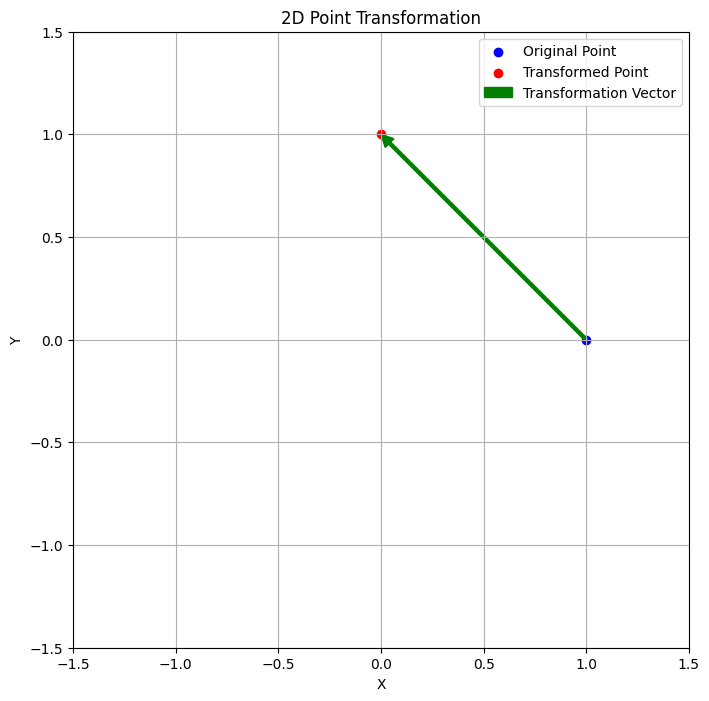

Original point: [1 0]
Transformed point: [6.123234e-17 1.000000e+00]


In [5]:
def rotate_2d(angle_degrees):
    angle_radians = np.radians(angle_degrees)
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    return np.array([
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ])

# Example: Rotate a point (1, 1) by 45 degrees
point = np.array([1,0])
rotation = rotate_2d(90)
new_point = np.dot(rotation, point)
visualize_transformation(point, new_point)
# print("Original point:", point)
# print("Rotated point:", new_point)

## Exercise: Rotate a point
In this exercise, we'll apply our knowledge of matrix transformations to Rotate a point.

Objectives:
1. Create a point centered at (1,0)
2. Rotate the point 80 degrees in the clockwise direction.


1.5


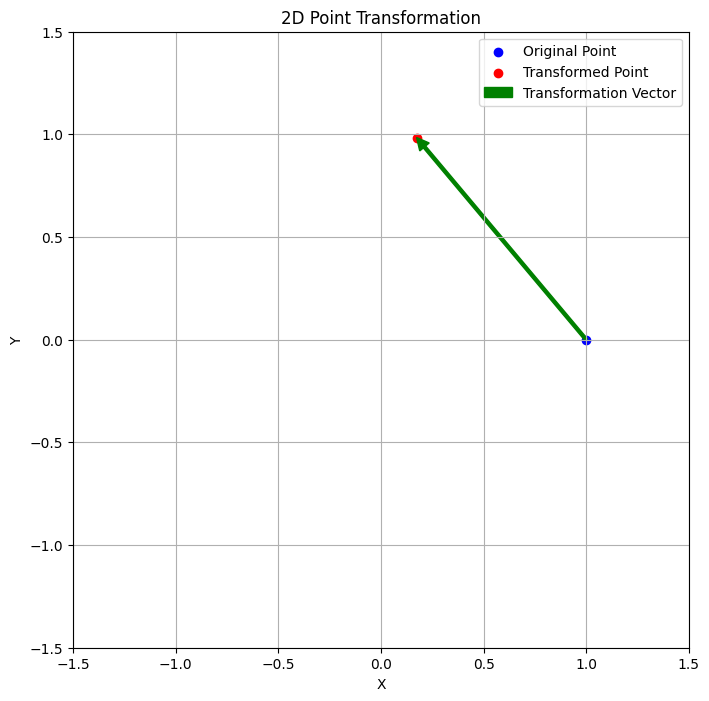

Original point: [1 0]
Transformed point: [0.17364818 0.98480775]


In [6]:
#Rotate the point
point = np.array([1,0])
rotation = rotate_2d(80)
new_point = np.dot(rotation, point)
visualize_transformation(point, new_point)

## Exercise: Rotate a star
In this exercise, we'll apply our knowledge of matrix transformations to rotate a star shape. This exercise demonstrates how rotation matrices can be used to manipulate geometric objects, which is a fundamental concept in medical imaging and computer graphics for biomedical applications.

Objectives:
1. Implement a rotation function using a 2D rotation matrix
2. Visualize the original and rotated star


In [29]:
def generate_star(center=(0, 0), num_points=5, outer_radius=1, inner_radius=0.5):
    '''
    This function generates the coordinates of a star shape based on the specified number of points,
    outer radius, inner radius, and center coordinates. The star is created by alternating between the
    outer and inner radii at calculated angles, resulting in a visually appealing star pattern.
    '''
    angles = np.linspace(np.pi/2, 5*np.pi/2, num_points*2, endpoint=False)
    radii = np.array([outer_radius, inner_radius] * num_points)
    x = radii * np.cos(angles) + center[0]
    y = radii * np.sin(angles) + center[1]
    return np.column_stack((x, y))

def rotate_vertices(star_points, angle_degrees):
    """
    This function rotates an object defined as a set of vertices.
    """
    rotation=rotate_2d(angle_degrees)
    print(np.shape(rotation))
    print(np.shape(point))
    rotated_star= rotation @

    return rotated_star



star = generate_star()

rotated_star = rotate_vertices(star, 45)

def plot_star(ax, star, title):
    ax.plot(star[:, 0], star[:, 1], 'b-')
    ax.plot([star[-1, 0], star[0, 0]], [star[-1, 1], star[0, 1]], 'b-')  # Connect last to first
    ax.set_title(title)
    ax.axis('equal')

    ax.grid(True)  # Add grid

    star_center = np.mean(star, axis=0)
    arrow_start = star_center

    direction = star[0] - star_center
    direction /= np.linalg.norm(direction)  # Normalize the direction vector
    arrow_length = 0.5
    arrow_end = star_center + (arrow_length) * direction
    ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8))


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_star(axs[0], star, 'Original Star')
plot_star(axs[1], rotated_star, 'Rotated Star')


(2, 2)
(2,)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 2)

## Exercise: Translate a star
In this exercise, we'll apply our knowledge of matrix transformations to rotate a star shape. This exercise demonstrates how rotation matrices can be used to manipulate geometric objects, which is a fundamental concept in medical imaging and computer graphics for biomedical applications.

Objectives:
1. Generate a star centered at (1,2)
2. Translate the star 2 units to the left
3. Visualize the original and translated star


In [40]:

def translate_vertices(vertices, translation_vector):
    """This function translates an object"""
    translation = translate_2d(translation_vector[0], translation_vector[1])
    translated_vertices= (translation @ vertices.T).T

    return translated_vertices


star = generate_star(center=(1, 2))

translated_star = translate_vertices(star, [2,1])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_star(axs[0], star, 'Original Star')
plot_star(axs[1], translated_star, 'Translated Star')


TypeError: generate_star() got an unexpected keyword argument 'homogeneous_point'

## Exercise: Rotate and Translate a star
Objectives:
1. Generate a start centered at (2,2)
2. Implement a function to rotate a star shape 45 degrees in the clockwise direction.
3. Implement a function to translate the star shape 3 units to the right and 2 units up.
4. Visualize the original and transformed star shapes.


NameError: name 'transformed_star' is not defined

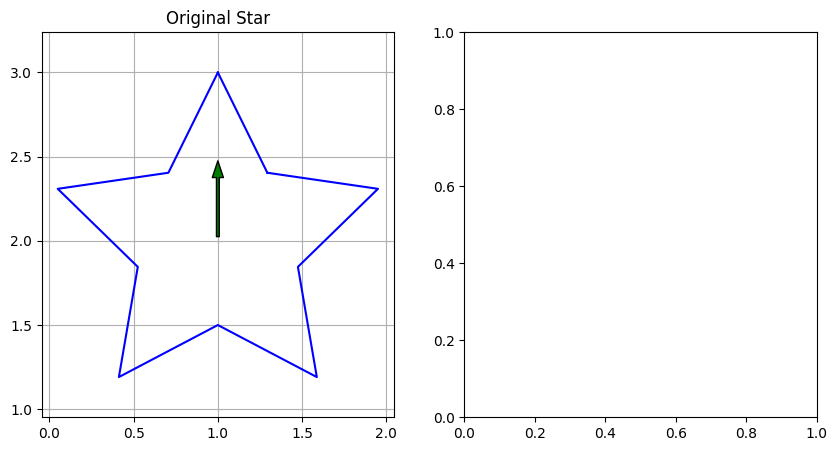

In [41]:

import numpy as np

def transform_object(object_points, angle, translation_vector):
    """This function rotates and translates a object"""

    return ""



fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_star(axs[0], star, 'Original Star')
plot_star(axs[1], transformed_star, 'Transformed Star')


# Conclusion

In this lesson, we've explored matrix transformations and discussed some of their applications in biomedical engineering. As you continue your studies, you'll encounter many more applications of matrix transformations in areas such as signal processing, medical robotics, and computational modeling of biological systems.
